In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [21]:
# 读取数据
file_path = 'data_fin.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# 查看原始数据的前几行
print("原始数据前几行：")
print(data.head())

原始数据前几行：
          Fe         Co         Mn         Al   Ni    B   Hf   Si   Cu    P  \
0  44.143049  39.897917  15.959034   0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
1  40.314556  39.046899  15.103242   5.535303  0.0  0.0  0.0  0.0  0.0  0.0   
2  39.298592  38.359388  15.818767   6.523253  0.0  0.0  0.0  0.0  0.0  0.0   
3  38.926863  35.510768  16.142792   9.419576  0.0  0.0  0.0  0.0  0.0  0.0   
4  35.412374  32.850360  15.535554  16.201711  0.0  0.0  0.0  0.0  0.0  0.0   

   ...  DO3  BCC  FCC  HCP  Orthorhombic  hexagonal  Tetragonal  \
0  ...    0    1    1    0             0          0           0   
1  ...    0    1    1    0             0          0           0   
2  ...    0    1    1    0             0          0           0   
3  ...    0    1    0    0             0          0           0   
4  ...    0    1    0    0             0          0           0   

   Primitive Cubic     Ms      Hc  
0                0  170.0   636.0  
1                0  159.0   769.0  
2    

In [22]:
# 定义不需要标准化的列
columns_to_exclude = ['DO3', 'BCC', 'FCC', 'HCP', 'Orthorhombic', 'hexagonal', 'Tetragonal', 'Primitive Cubic']

# 分离需要标准化和不需要标准化的列
data_to_scale = data.drop(columns_to_exclude, axis=1)
data_not_to_scale = data[columns_to_exclude]

# 创建StandardScaler对象
scaler = StandardScaler()

In [23]:
# 对需要标准化的列进行标准化
standardized_data = scaler.fit_transform(data_to_scale)
standardized_df = pd.DataFrame(standardized_data, columns=data_to_scale.columns)

# 合并标准化和非标准化的列
standardized_full_df = pd.concat([standardized_df, data_not_to_scale], axis=1)

# 查看标准化后数据的前几行
print("\n标准化后数据前几行：")
print(standardized_full_df.head())


标准化后数据前几行：
         Fe        Co        Mn        Al        Ni         B        Hf  \
0  0.071356  1.351064  1.739849 -0.719747 -1.112277 -0.555861 -0.085931   
1 -0.085876  1.293982  1.617344  0.010049 -1.112277 -0.555861 -0.085931   
2 -0.127601  1.247868  1.719770  0.140304 -1.112277 -0.555861 -0.085931   
3 -0.142867  1.056797  1.766153  0.522167 -1.112277 -0.555861 -0.085931   
4 -0.287204  0.878351  1.679229  1.416351 -1.112277 -0.555861 -0.085931   

         Si        Cu         P  ...        Ms        Hc  DO3  BCC  FCC  HCP  \
0 -0.574362 -0.398408 -0.250716  ...  0.831278 -0.321801    0    1    1    0   
1 -0.574362 -0.398408 -0.250716  ...  0.621457 -0.288001    0    1    1    0   
2 -0.574362 -0.398408 -0.250716  ...  0.144589 -0.301470    0    1    1    0   
3 -0.574362 -0.398408 -0.250716  ...  1.231847 -0.443025    0    1    0    0   
4 -0.574362 -0.398408 -0.250716  ...  1.041100  0.123194    0    1    0    0   

   Orthorhombic  hexagonal  Tetragonal  Primitive Cubic 

In [24]:
# 对标准化部分进行逆操作还原数据
inverse_transformed_data = scaler.inverse_transform(standardized_data)
inverse_transformed_df = pd.DataFrame(inverse_transformed_data, columns=data_to_scale.columns)

# 合并逆变换后的数据和非标准化的列
inverse_transformed_full_df = pd.concat([inverse_transformed_df, data_not_to_scale], axis=1)

# 查看逆操作还原后数据的前几行
print("\n逆操作还原后数据前几行：")
print(inverse_transformed_full_df.head())


逆操作还原后数据前几行：
          Fe         Co         Mn         Al   Ni    B   Hf            Si  \
0  44.143049  39.897917  15.959034   0.000000  0.0  0.0  0.0  4.440892e-16   
1  40.314556  39.046899  15.103242   5.535303  0.0  0.0  0.0  4.440892e-16   
2  39.298592  38.359388  15.818767   6.523253  0.0  0.0  0.0  4.440892e-16   
3  38.926863  35.510768  16.142792   9.419576  0.0  0.0  0.0  4.440892e-16   
4  35.412374  32.850360  15.535554  16.201711  0.0  0.0  0.0  4.440892e-16   

    Cu    P  ...     Ms      Hc  DO3  BCC  FCC  HCP  Orthorhombic  hexagonal  \
0  0.0  0.0  ...  170.0   636.0    0    1    1    0             0          0   
1  0.0  0.0  ...  159.0   769.0    0    1    1    0             0          0   
2  0.0  0.0  ...  134.0   716.0    0    1    1    0             0          0   
3  0.0  0.0  ...  191.0   159.0    0    1    0    0             0          0   
4  0.0  0.0  ...  181.0  2387.0    0    1    0    0             0          0   

   Tetragonal  Primitive Cubic  
0  

Text(0, 0.5, 'Hc Value')

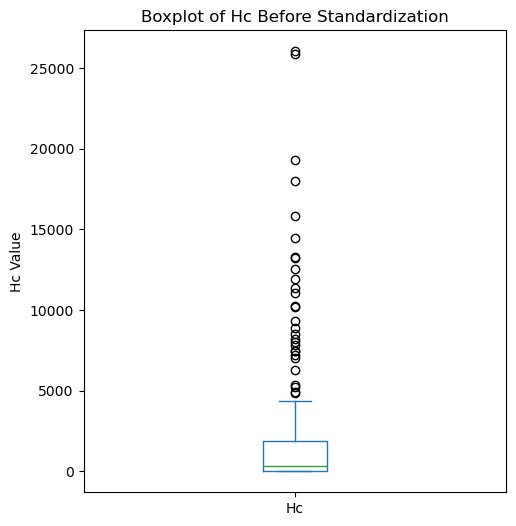

In [25]:
# 绘制标准化前后Hc的箱式图
plt.figure(figsize=(12, 6))

# 绘制标准化前Hc的箱式图
plt.subplot(1, 2, 1)
data['Hc'].plot.box()
plt.title('Boxplot of Hc Before Standardization')
plt.ylabel('Hc Value')


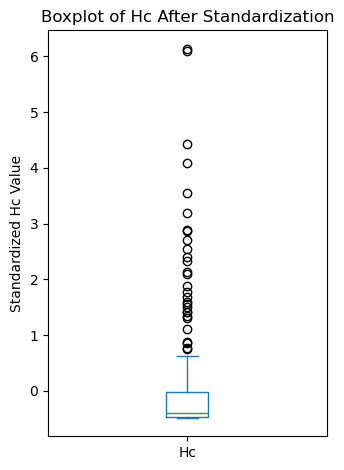

In [26]:
# 绘制标准化后Hc的箱式图
plt.subplot(1, 2, 2)
standardized_df['Hc'].plot.box()
plt.title('Boxplot of Hc After Standardization')
plt.ylabel('Standardized Hc Value')

plt.tight_layout()
plt.show()